## Exercise 1: Numbers to Tokens

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import string

plt.style.use("dark_background")

# Import GPT2
from transformers import GPT2Model, GPT2Tokenizer

In [2]:
digits = sorted(list(set(string.digits)))
digits

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [3]:
str_numbers = []

for i in digits[1:]:
    two_dig = i+"0"
    three_dig = i+"00"

    str_numbers.append(i)
    str_numbers.append(two_dig)
    str_numbers.append(three_dig)

str_numbers.append("0")
str_numbers.append("1000")

int_numbers = [ int(i) for i in str_numbers ]
int_numbers = sorted(int_numbers)


In [4]:
gpt2_tok = GPT2Tokenizer.from_pretrained("gpt2")
gpt2_tok.vocab_size

50257

In [5]:
tokens = [ gpt2_tok.encode(str(i))[0] for i in int_numbers ]

In [6]:
for num,tok in zip(int_numbers,tokens):
    print(f"The number {num:>5} is token(s) {tok}")

The number     0 is token(s) 15
The number     1 is token(s) 16
The number     2 is token(s) 17
The number     3 is token(s) 18
The number     4 is token(s) 19
The number     5 is token(s) 20
The number     6 is token(s) 21
The number     7 is token(s) 22
The number     8 is token(s) 23
The number     9 is token(s) 24
The number    10 is token(s) 940
The number    20 is token(s) 1238
The number    30 is token(s) 1270
The number    40 is token(s) 1821
The number    50 is token(s) 1120
The number    60 is token(s) 1899
The number    70 is token(s) 2154
The number    80 is token(s) 1795
The number    90 is token(s) 3829
The number   100 is token(s) 3064
The number   200 is token(s) 2167
The number   300 is token(s) 6200
The number   400 is token(s) 7029
The number   500 is token(s) 4059
The number   600 is token(s) 8054
The number   700 is token(s) 9879
The number   800 is token(s) 7410
The number   900 is token(s) 12865
The number  1000 is token(s) 12825


[]

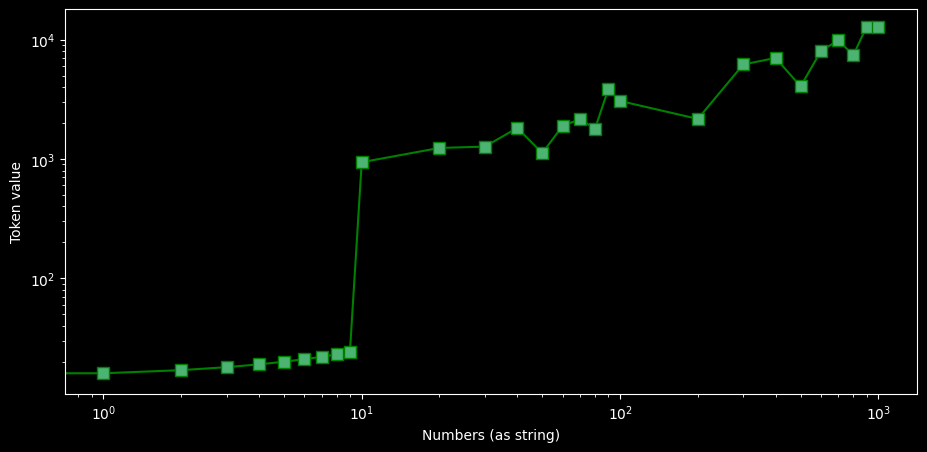

In [43]:
plt.figure(figsize=(11,5))
plt.plot(int_numbers,tokens,"sg-",markersize=8,markerfacecolor=[.3,.7,.45])
plt.gca().set(xticks=int_numbers,xscale="log",yscale="log",xlabel="Numbers (as string)",ylabel="Token value")
plt.plot()

In [8]:
for num in int_numbers:
    print(f"The number {num/2:>5} is token(s) {gpt2_tok.encode(str(num/2))}")

The number   0.0 is token(s) [15, 13, 15]
The number   0.5 is token(s) [15, 13, 20]
The number   1.0 is token(s) [16, 13, 15]
The number   1.5 is token(s) [16, 13, 20]
The number   2.0 is token(s) [17, 13, 15]
The number   2.5 is token(s) [17, 13, 20]
The number   3.0 is token(s) [18, 13, 15]
The number   3.5 is token(s) [18, 13, 20]
The number   4.0 is token(s) [19, 13, 15]
The number   4.5 is token(s) [19, 13, 20]
The number   5.0 is token(s) [20, 13, 15]
The number  10.0 is token(s) [940, 13, 15]
The number  15.0 is token(s) [1314, 13, 15]
The number  20.0 is token(s) [1238, 13, 15]
The number  25.0 is token(s) [1495, 13, 15]
The number  30.0 is token(s) [1270, 13, 15]
The number  35.0 is token(s) [2327, 13, 15]
The number  40.0 is token(s) [1821, 13, 15]
The number  45.0 is token(s) [2231, 13, 15]
The number  50.0 is token(s) [1120, 13, 15]
The number 100.0 is token(s) [3064, 13, 15]
The number 150.0 is token(s) [8628, 13, 15]
The number 200.0 is token(s) [2167, 13, 15]
The number 

## Exercise 2: How Long Are Numbers?

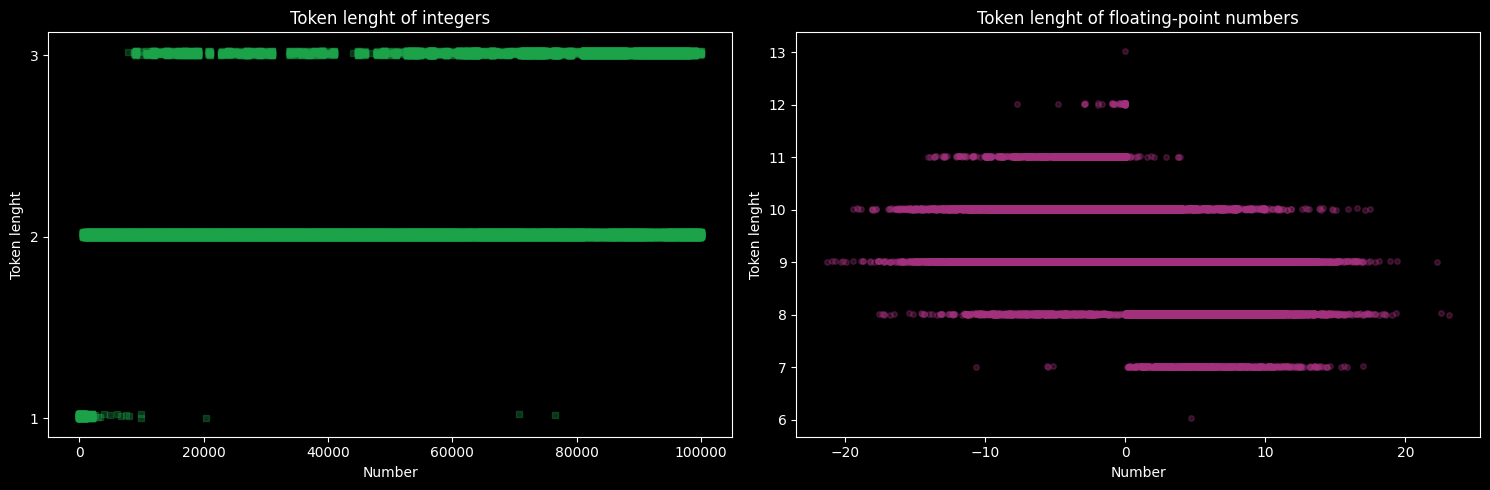

In [39]:
int_num_to_100k                 = list(np.arange(100_001))
int_num_to_100k_tokens          = [ gpt2_tok.encode(str(i)) for i in int_num_to_100k ]
int_num_to_100k_token_length    = [ len(ts) for ts in int_num_to_100k_tokens ]

float_num_100k                      = np.random.normal(loc=0,scale=5,size=100_000)
float_num_rand_100k_tokens          = [ gpt2_tok.encode(str(i)) for i in float_num_100k ]
float_num_rand_100k_token_lenght    = [ len(i) for i in float_num_rand_100k_tokens ]

_,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].scatter(int_num_to_100k,int_num_to_100k_token_length+np.random.rand(len(int_num_to_100k_token_length))/40,s=16,color=[.12,.65,.3],marker="s",alpha=.3)
ax[0].set(xlabel="Number",ylabel="Token lenght",title="Token lenght of integers",yticks=range(min(int_num_to_100k_token_length),max(int_num_to_100k_token_length)+1))

ax[1].scatter(float_num_100k,float_num_rand_100k_token_lenght+np.random.rand(len(float_num_rand_100k_token_lenght))/35,s=16,color=[.65,.2,.5],marker="o",alpha=.3)
ax[1].set(xlabel="Number",ylabel="Token lenght",title="Token lenght of floating-point numbers",yticks=range(min(float_num_rand_100k_token_lenght),max(float_num_rand_100k_token_lenght)+1))

plt.tight_layout()
plt.show()

## Exercise 3: Does Math Work in Token Conversions?

In [10]:
eq = "5 x 3 ="
eq_tokens = gpt2_tok.encode(eq)

print(f"'{eq}' ----> {eq_tokens}")
print(f"Product of tokens = {np.prod(eq_tokens):,}")
print(f"Decoded token: {gpt2_tok.decode([np.prod(eq_tokens)])}") # got an error, as expected

'5 x 3 =' ----> [20, 2124, 513, 796]
Product of tokens = 166,753,856


TypeError: sequence item 0: expected str instance, NoneType found

In [11]:
t5 = gpt2_tok.encode("5")
t3 = gpt2_tok.encode("3")

print(f"'5' and '3' have tokens {t5} and {t3}.")
print(f"Their product is {t5[0]*t3[0]}, which is '{gpt2_tok.decode([t5[0]*t3[0]])}'")

'5' and '3' have tokens [20] and [18].
Their product is 360, which is ' D'


## Exercise 4: How About With Embeddings?

In [13]:
gpt2 = GPT2Model.from_pretrained("gpt2")
gpt2

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D(nf=2304, nx=768)
        (c_proj): Conv1D(nf=768, nx=768)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D(nf=3072, nx=768)
        (c_proj): Conv1D(nf=768, nx=3072)
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

In [21]:
embeddings = gpt2.wte.weight.detach().numpy()
embeddings.shape

(50257, 768)

[18]
[20]
[20, 10, 18]
[20, 87, 18]


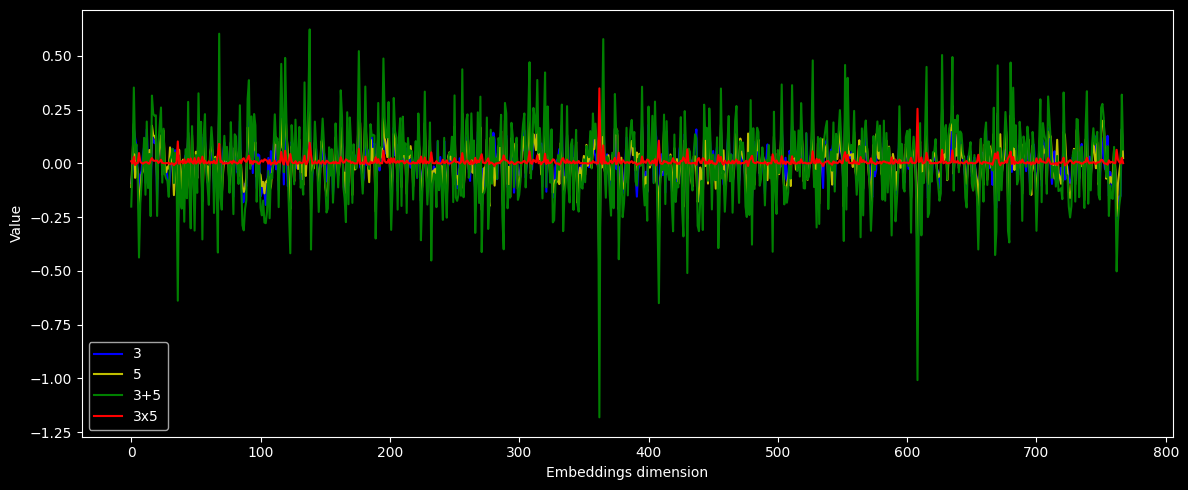

In [46]:
t3 = gpt2_tok.encode("3")
t5 = gpt2_tok.encode("5")

plt.figure(figsize=(12,5))

plt.plot(embeddings[t3[0]],label="3",c="b")
plt.plot(embeddings[t5[0]],label="5",c="y")
plt.plot(embeddings[t3[0]]+embeddings[t5[0]],label="3+5",c="g")
plt.plot(embeddings[t3[0]]*embeddings[t5[0]],label="3x5",c="r")

plt.gca().set(xlabel="Embeddings dimension",ylabel="Value")
plt.legend()

plt.tight_layout()
plt.show()


In [48]:
sumUnembedding  = (embeddings[t3[0]]+embeddings[t5[0]]) @ embeddings.T
prodUnembedding = (embeddings[t3[0]]*embeddings[t5[0]]) @ embeddings.T

print(f'Summed vector X embeddings matrix = unembeddings vector')
print(f'    {(embeddings[t3[0]]+embeddings[t5[0]]).shape}    X    {embeddings.shape}   =  {sumUnembedding.shape}\n')

print(f'Max embedding of 5+3 = "{gpt2_tok.decode(np.argmax(sumUnembedding))}"')
print(f'Max embedding of 5x3 = "{gpt2_tok.decode(np.argmax(prodUnembedding))}"')

Summed vector X embeddings matrix = unembeddings vector
    (768,)    X    (50257, 768)   =  (50257,)

Max embedding of 5+3 = "5"
Max embedding of 5x3 = " Weinstein"
